In [1]:
# Setelah di-upload, baca dataset dengan pandas
import pandas as pd

# Ganti 'nama_file.csv' sesuai nama file kamu
df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')

# Tampilkan 5 data teratas
df.head()

,Customer ID,Age,Gender,Annual_Income,Spending_Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [2]:
# Cek dimensi dan tipe data
print("Ukuran dataset:", df.shape)
print("\nTipe data:")
print(df.dtypes)

# Pilih hanya 6 atribut numerik yang digunakan untuk clustering
selected_features = ['Age', 'Annual_Income', 'Spending_Score']

data = df[selected_features]
print("\nStatistik deskriptif fitur yang dipilih:")
print(data.describe())

Ukuran dataset: (15079, 5)

Tipe data:
Customer ID       object
Age                int64
Gender            object
Annual_Income      int64
Spending_Score     int64
dtype: object

Statistik deskriptif fitur yang dipilih:
                Age  Annual_Income  Spending_Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max       90.000000  199974.000000      100.000000


In [3]:
# Tahap 2: Normalisasi menggunakan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Konversi ke DataFrame agar lebih mudah dibaca
import numpy as np
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)
data_scaled_df.head()

,Age,Annual_Income,Spending_Score
0,0.166667,0.730511,0.888889
1,0.555556,0.917278,0.949495
2,0.611111,0.282798,0.757576
3,0.069444,0.196930,0.565657
4,0.083333,0.743143,0.757576


C:\Users\satria\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\satria\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


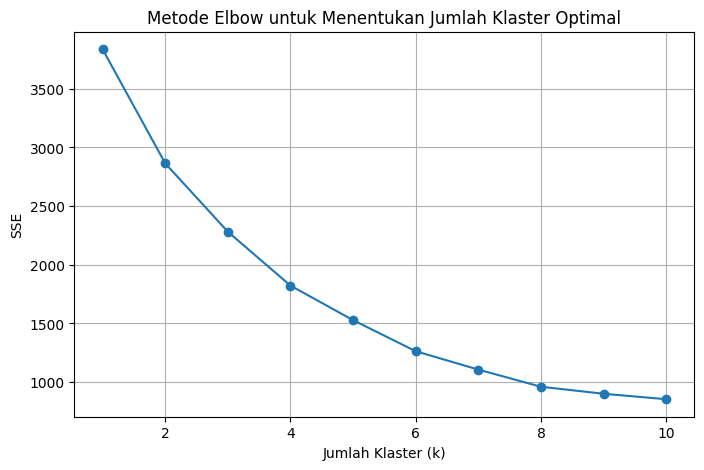

In [4]:
# Tahap 3: Menentukan jumlah klaster optimal dengan Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.grid(True)
plt.show()

In [5]:
# Tahap 4: Evaluasi dengan Silhouette Score untuk k=2 sampai k=10
from sklearn.metrics import silhouette_score

print("\nEvaluasi Silhouette Score untuk setiap jumlah klaster (k):")
print("=" * 50)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_scaled)
    sil_score = silhouette_score(data_scaled, cluster_labels)
    print(f"Jumlah Klaster: {k} -> Silhouette Score: {sil_score:.4f}")


Evaluasi Silhouette Score untuk setiap jumlah klaster (k):
Jumlah Klaster: 2 -> Silhouette Score: 0.2453
Jumlah Klaster: 3 -> Silhouette Score: 0.2412
Jumlah Klaster: 4 -> Silhouette Score: 0.2639
Jumlah Klaster: 5 -> Silhouette Score: 0.2670
Jumlah Klaster: 6 -> Silhouette Score: 0.2900
Jumlah Klaster: 7 -> Silhouette Score: 0.2820
Jumlah Klaster: 8 -> Silhouette Score: 0.2797
Jumlah Klaster: 9 -> Silhouette Score: 0.2886
Jumlah Klaster: 10 -> Silhouette Score: 0.2751


In [9]:
# Tahap 5: Clustering akhir (gunakan jumlah klaster optimal, misalnya k=4)
optimal_k = 6  # Ganti sesuai hasil Elbow/Silhouette terbaik
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Tambahkan hasil klaster ke dataframe asli
df['cluster'] = clusters

# Lihat hasil awal klaster
print("\nData dengan label klaster:")
print(df[['cluster'] + selected_features].head())

# Tahap 6: Ringkasan hasil klaster
cluster_summary = df.groupby('cluster')[selected_features].mean().round(2)
print("\nRata-rata tiap fitur untuk masing-masing klaster:")
print(cluster_summary)


Data dengan label klaster:
   cluster  Age  Annual_Income  Spending_Score
0        2   30         151479              89
1        4   58         185088              95
2        3   62          70912              76
3        5   23          55460              57
4        2   24         153752              76

Rata-rata tiap fitur untuk masing-masing klaster:
           Age  Annual_Income  Spending_Score
cluster                                      
0        74.52       84293.78           23.90
1        43.42      160143.65           23.38
2        33.94      136349.65           77.81
3        63.79       60433.85           77.69
4        73.78      157847.67           64.84
5        34.93       61951.18           35.30


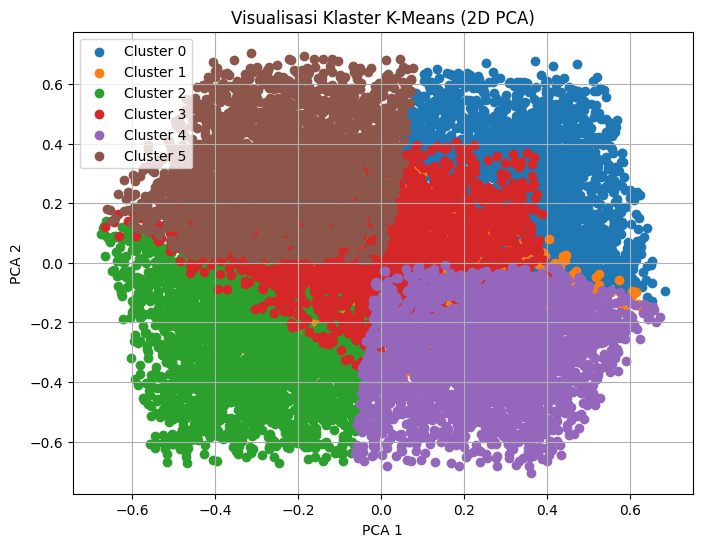

In [10]:
from sklearn.decomposition import PCA

# Reduksi dimensi dari 6D ke 2D untuk visualisasi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Tambahkan kolom PCA ke dataframe
df['pca1'] = data_pca[:, 0]
df['pca2'] = data_pca[:, 1]

# Visualisasi hasil klaster dalam 2D
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster_id}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Klaster K-Means (2D PCA)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data_scaled, df['cluster'])
print(f"\nSilhouette Score untuk k = {optimal_k}: {sil_score:.4f}")


Silhouette Score untuk k = 6: 0.2900
